In [92]:
# Importing needed Packe
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta

%matplotlib inline

In [103]:
# Getting cryptocurrency and vs_currency and days from the user
crypto_id = input("Enter Id: ")
vs_currency = input("Enter vs_currency: ")
days = int(input("Enter the number of how many days ago you want(e.g: 1,14,30): "))

Enter Id:  tether
Enter vs_currency:  usd
Enter the number of how many days ago you want(e.g: 1,14,30):  10


#### Showing cryptocurrency's date in a DataFrame

In [104]:
req = requests.get("https://api.coingecko.com/api/v3/coins/%s/market_chart?vs_currency=%s&days=%s&interval=daily" % (crypto_id, vs_currency, days-1)) # Sending the request

dates = pd.Series([date.today() - timedelta(days = day) for day in range(days)]) # Series of last 10 dates
prices = pd.Series(reversed([price[1] for price in req.json()['prices']])) # Series of last 10 days prices
market_caps = pd.Series(reversed([mk[1] for mk in req.json()['market_caps']])) # Series of last 10 days marker caps
total_volumes = pd.Series(reversed([tv[1] for tv in req.json()['total_volumes']])) # Series of last 10 days total volumes
# Cryptocurrency's DataFrame
crypto_df = pd.DataFrame(
    {
        'Price':prices,
        'Market Caps':market_caps,
        'Total Volumes':total_volumes
    },
)
crypto_df.index = dates
crypto_df

,Price,Market Caps,Total Volumes
2022-07-06,1.000332,6.592802e+10,5.692147e+10
2022-07-05,0.998911,6.597165e+10,5.441035e+10
2022-07-04,0.999797,6.606811e+10,4.777983e+10
2022-07-03,1.000759,6.611555e+10,3.781657e+10
2022-07-02,1.001486,6.630251e+10,3.763610e+10
2022-07-01,1.002161,6.630277e+10,6.331057e+10
2022-06-30,0.997063,6.636013e+10,5.559929e+10
2022-06-29,1.000997,6.651598e+10,5.391248e+10
2022-06-28,1.000334,6.683999e+10,4.899169e+10
2022-06-27,1.000570,6.684445e+10,4.638654e+10


#### Showing cryptocurrency's data in Plots

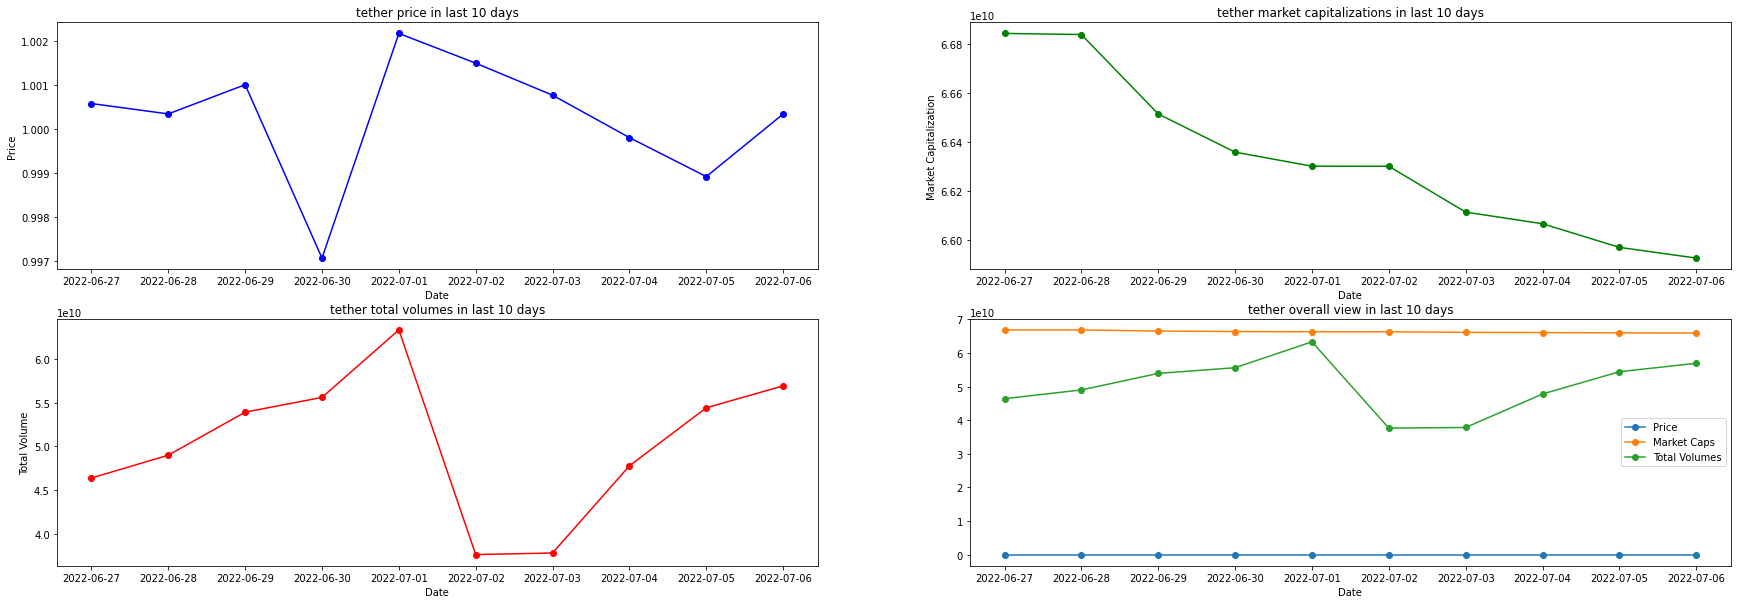

In [105]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(30, 10)) # Creating figures for pltos
fig, ((ax1, ax2), (ax3, ax4)) = plot_objects

# Showing cryptocurrency's price in a plot
ax1.plot(crypto_df.index, crypto_df["Price"], 'bo-')
ax1.set_title("%s price in last %s days" % (crypto_id, days))
ax1.set_xlabel("Date")
ax1.set_ylabel("Price")

# Showing cryptocurrency's market caps in a plot
ax2.plot(crypto_df.index, crypto_df["Market Caps"], 'go-')
ax2.set_title("%s market capitalizations in last %s days" % (crypto_id, days))
ax2.set_xlabel("Date")
ax2.set_ylabel("Market Capitalization")

# Shwoing cryptocurrency's total volumes in a plot
ax3.plot(crypto_df.index, crypto_df["Total Volumes"], 'ro-')
ax3.set_title("%s total volumes in last %s days" % (crypto_id, days))
ax3.set_xlabel("Date")
ax3.set_ylabel("Total Volume")

# Showing cryptocurrency's overall view in a plot
ax4.plot(crypto_df, 'o-')
ax4.set_title("%s overall view in last %s days" % (crypto_id, days))
ax4.set_xlabel("Date")
ax4.legend(crypto_df.columns)

#### Showing cryptocurrency's data in Bars

Text(0, 0.5, 'Total Volume')

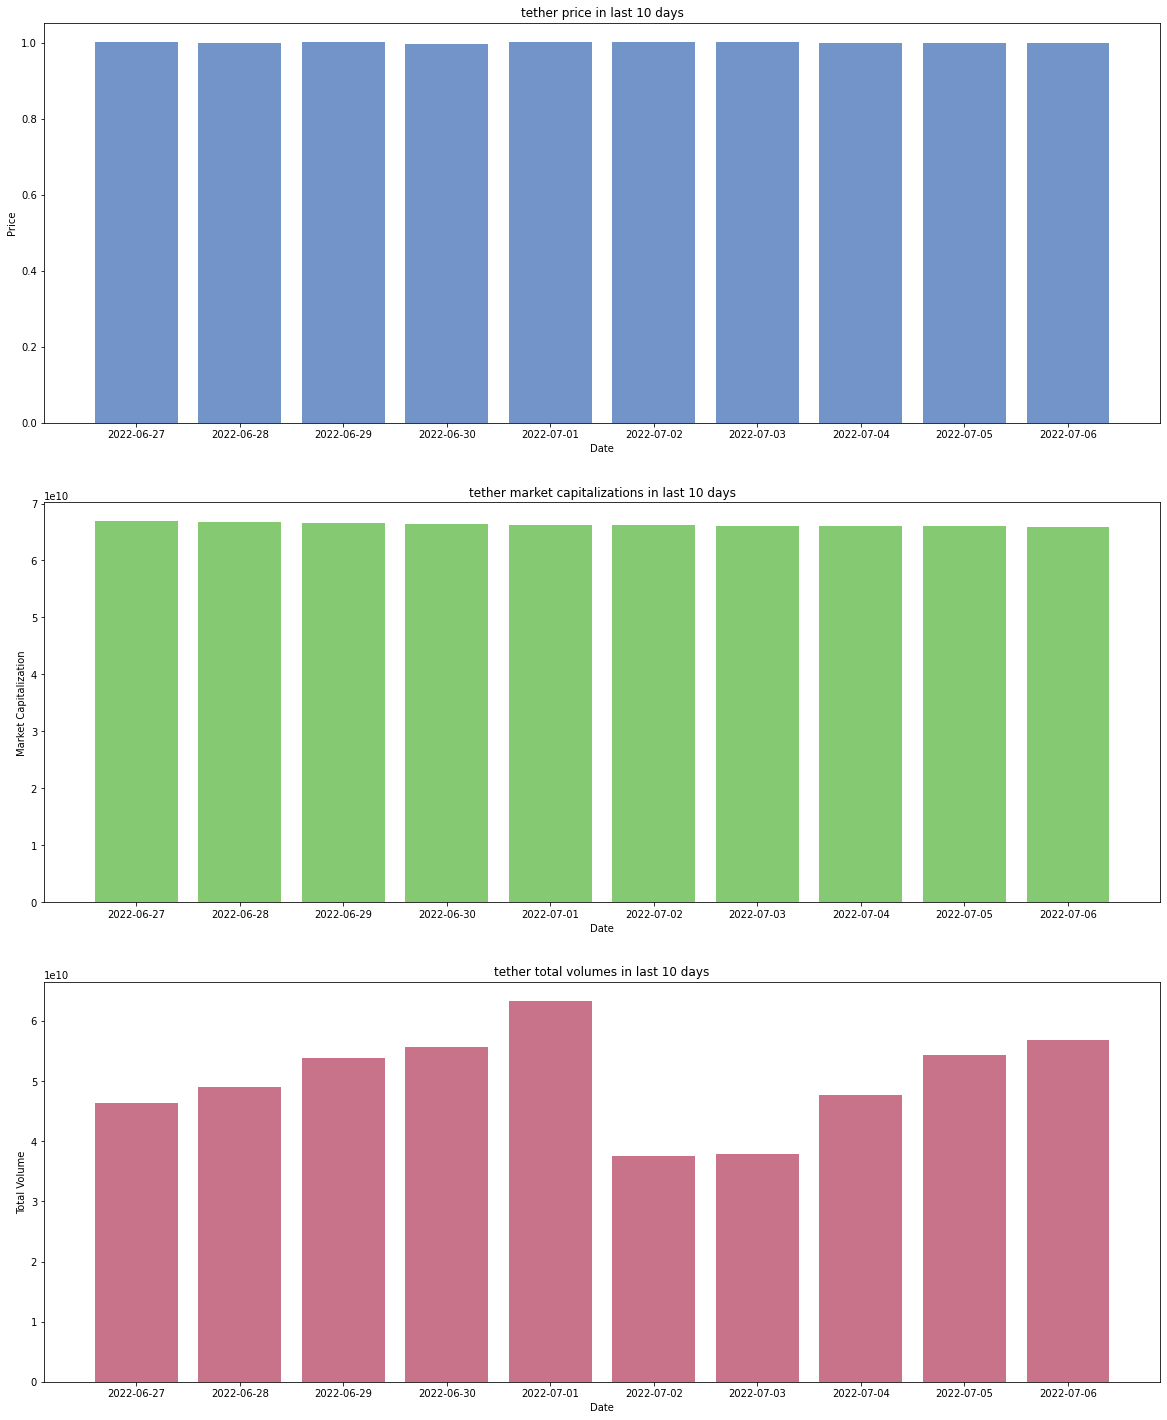

In [108]:
plot_objects = plt.subplots(nrows=3, ncols=1, figsize=(20, 25)) # Creating figures for bars
fig, ((ax1, ax2, ax3)) = plot_objects

# Showing cryptocurrency's price in a bar
ax1.bar(crypto_df.index, crypto_df["Price"], color="#7394c9", linewidth=2)
ax1.set_title("%s price in last %s days" % (crypto_id, days))
ax1.set_xlabel("Date")
ax1.set_ylabel("Price")

# Showing cryptocurrency's market caps in a bar
ax2.bar(crypto_df.index, crypto_df["Market Caps"], color="#86c973")
ax2.set_title("%s market capitalizations in last %s days" % (crypto_id, days))
ax2.set_xlabel("Date")
ax2.set_ylabel("Market Capitalization")

# Shwoing cryptocurrency's total volumes in a bar
ax3.bar(crypto_df.index, crypto_df["Total Volumes"], color="#c9738a")
ax3.set_title("%s total volumes in last %s days" % (crypto_id, days))
ax3.set_xlabel("Date")
ax3.set_ylabel("Total Volume")